# Importing Neccesary Library and Dataset

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import pyodbc
import datasist as ds
import seaborn as sns
import matplotlib
import warnings
from matplotlib import pyplot as plt
%matplotlib inline
from pandas_profiling import ProfileReport

In [2]:
## importing dataset using the pandas read_csv syntax and storing in a variable name dr

dr = pd.read_csv("C:/Users/jeana/OneDrive/Desktop/Data Analytics-Capstone Project/clean_dataset_risk_analytics.csv")

# Performing Data Exploration

In [3]:
## profiling the dataset to get an insight into the characteristics 

profile = ProfileReport(dr, title="Loan Roll into Early Delinquency Prediction")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
## using datasist library to also preview dataset

ds.structdata.describe(dr)

First five data points


loan_id  monthly_income  origination_score_band  TOB_months  \
0     1000          6000.0                       5        83.0   
1     1001         39000.0                       5        82.0   
2     1002         18000.0                       5        78.0   
3     1003         23250.0                       3        76.0   
4     1004         12000.0                       3        74.0   

   closing_principal_balance  original_loan_amount product  \
0                      300.0                1800.0       B   
1                     7200.0               11700.0       B   
2                     2700.0                5400.0       B   
3                     3900.0                6900.0       B   
4                     2100.0                3600.0       B   

   original_loan_term  remaining_loan_term  delq_history  target  
0                  24                    5           0.0       0  
1                  60                   42       10000.0       0  
2                  60                   46        1000.0       0  
3                  60                   48      110100.0       1  
4                  60                   50      100000.0       0



Random five data points


loan_id  monthly_income  origination_score_band  TOB_months  \
2022     2840          3750.0                       5         8.0   
5667     6139         15000.0                       5        21.0   
4321     4922          8250.0                       8        13.0   
1665     2511          2250.0                       2        16.0   
5244     5759         12750.0                       5        51.0   

      closing_principal_balance  original_loan_amount product  \
2022                     3600.0                3600.0       A   
5667                    11250.0               11250.0       A   
4321                     1200.0                1200.0       A   
1665                      200.0                 200.0       C   
5244                     8250.0                9750.0       A   

      original_loan_term  remaining_loan_term  delq_history  target  
2022                  60                   56           0.0       0  
5667                  60                   43          10.0       0  
4321                  36                   27           0.0       1  
1665                  42                   31      100000.0       0  
5244                  60                   12           0.0       0



Last five data points


loan_id  monthly_income  origination_score_band  TOB_months  \
5778     6245          8250.0                       4         6.0   
5779     6246          2250.0                       5         6.0   
5780     6247          3750.0                       5         6.0   
5781     6248          9750.0                       7         6.0   
5782     6249          2250.0                       6         6.0   

      closing_principal_balance  original_loan_amount product  \
5778                     6000.0                6000.0       A   
5779                     1500.0                1500.0       C   
5780                     3000.0                3000.0       D   
5781                     7500.0                7500.0       D   
5782                     1500.0                1500.0       C   

      original_loan_term  remaining_loan_term  delq_history  target  
5778                  36                   35           0.0       0  
5779                  12                   11           0.0       0  
5780                  60                   65           0.0       0  
5781                  60                   65           0.0       1  
5782                  36                   35           0.0       0



Shape of  data set: (5783, 11)


Size of  data set: 63613


Data Types
Note: All Non-numerical features are identified as objects in pandas


Data Type
loan_id                       int64
monthly_income              float64
origination_score_band        int64
TOB_months                  float64
closing_principal_balance   float64
original_loan_amount        float64
product                      object
original_loan_term            int64
remaining_loan_term           int64
delq_history                float64
target                        int64



Numerical Features in Data set
['loan_id', 'monthly_income', 'origination_score_band', 'TOB_months', 'closing_principal_balance', 'original_loan_amount', 'original_loan_term', 'remaining_loan_term', 'delq_history', 'target']


Categorical Features in Data set


['product']



Statistical Description of Columns


loan_id  monthly_income  origination_score_band   TOB_months  \
count  5783.000000     5406.000000             5783.000000  5406.000000   
mean   3625.042711    14314.372919                3.904029    28.385683   
std    1516.292643    13799.514988                1.490877    16.357494   
min    1000.000000      750.000000                1.000000     6.000000   
25%    2310.500000     6000.000000                3.000000    17.000000   
50%    3623.000000     9750.000000                4.000000    24.000000   
75%    4934.500000    17250.000000                5.000000    38.000000   
max    6249.000000    99750.000000                8.000000    83.000000   

       closing_principal_balance  original_loan_amount  original_loan_term  \
count                5406.000000           5406.000000         5783.000000   
mean                 5714.391417           6630.701073           62.023517   
std                  7837.483534           8491.265603           23.774170   
min                   100.000000            100.000000           12.000000   
25%                  1380.000000           1800.000000           60.000000   
50%                  3000.000000           3750.000000           60.000000   
75%                  6800.000000           8100.000000           60.000000   
max                 88200.000000          90000.000000          192.000000   

       remaining_loan_term   delq_history       target  
count          5783.000000    5406.000000  5783.000000  
mean             39.618364   20208.700888     0.302092  
std              25.004423   45456.709993     0.459205  
min               0.000000       0.000000     0.000000  
25%              23.000000       0.000000     0.000000  
50%              40.000000       0.000000     0.000000  
75%              51.000000    1000.000000     1.000000  
max             177.000000  332210.000000     1.000000



Description of Categorical Features


count unique top  freq
product  5783      4   A  2942



Unique class Count of Categorical features




Missing Values in Data


features  missing_counts  missing_percent
0                     loan_id               0              0.0
1              monthly_income             377              6.5
2      origination_score_band               0              0.0
3                  TOB_months             377              6.5
4   closing_principal_balance             377              6.5
5        original_loan_amount             377              6.5
6                     product               0              0.0
7          original_loan_term               0              0.0
8         remaining_loan_term               0              0.0
9                delq_history             377              6.5
10                     target               0              0.0

C:\Users\jeana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


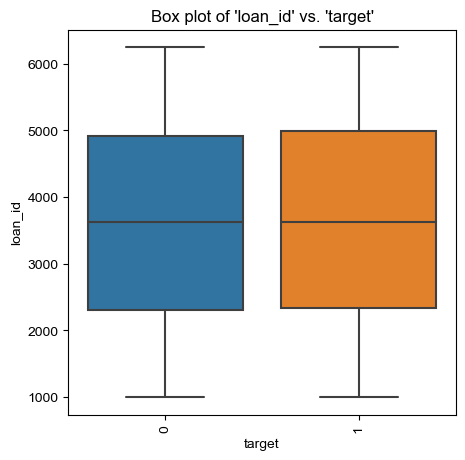

C:\Users\jeana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


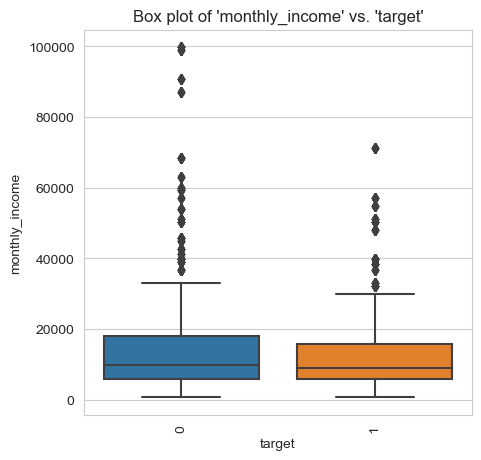

C:\Users\jeana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


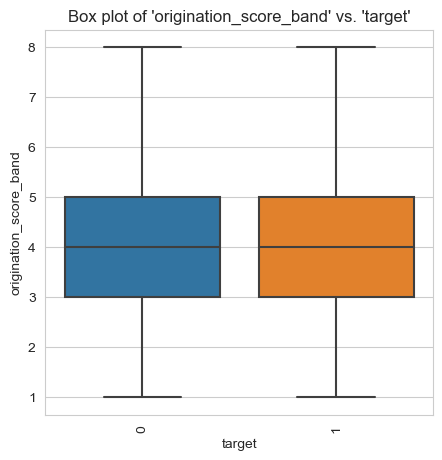

C:\Users\jeana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


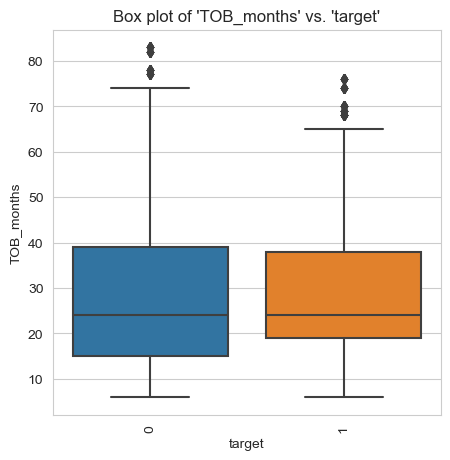

C:\Users\jeana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


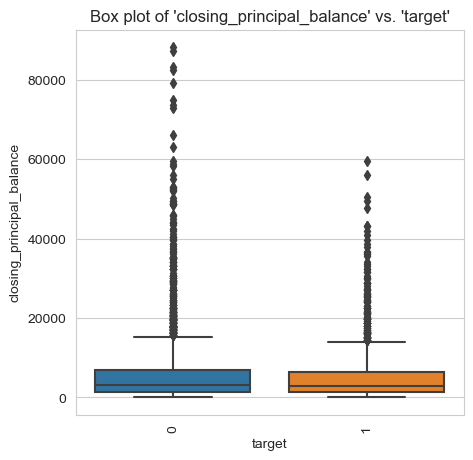

C:\Users\jeana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


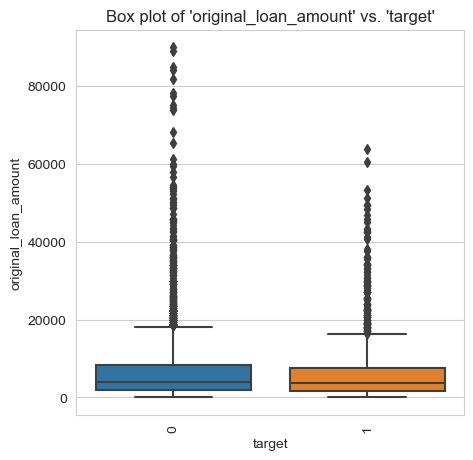

C:\Users\jeana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


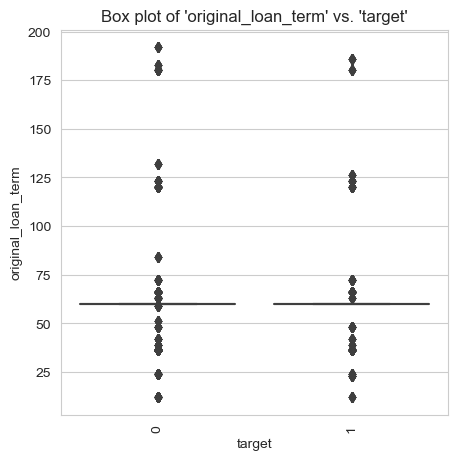

C:\Users\jeana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


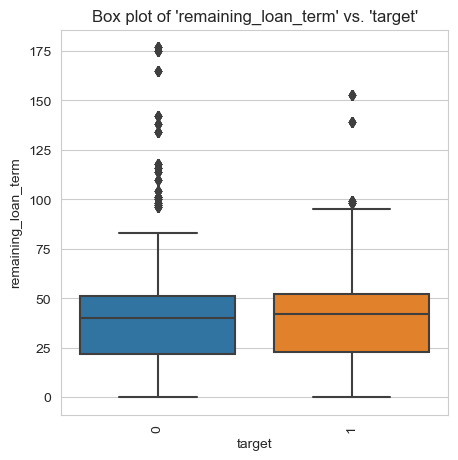

C:\Users\jeana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


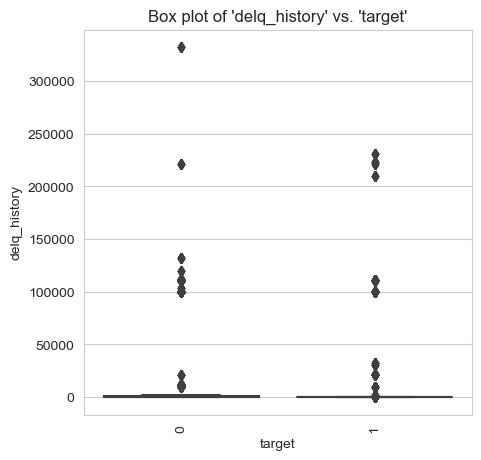

C:\Users\jeana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


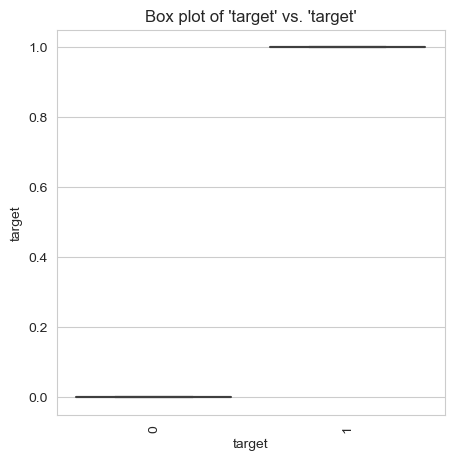

In [5]:
## visualizing the data on the boxplot and histogram

ds.visualizations.boxplot(data=dr, target='target', fig_size=(5,5))

C:\Users\jeana\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


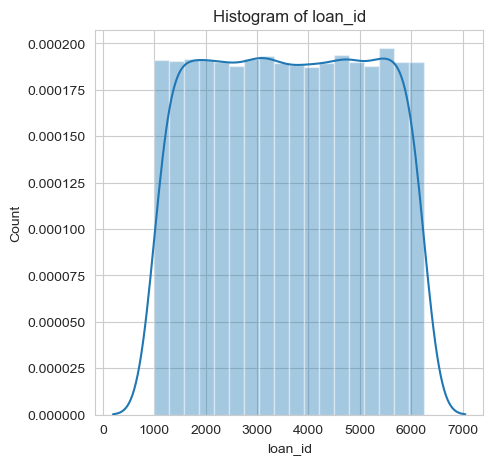

C:\Users\jeana\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


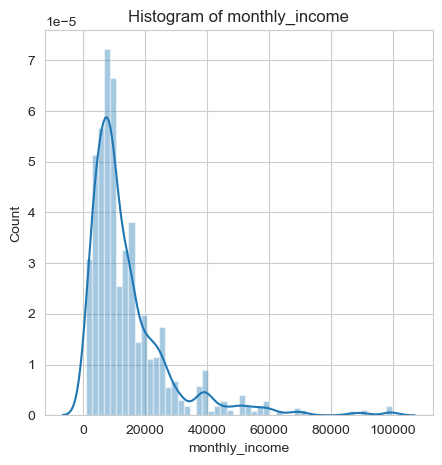

C:\Users\jeana\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


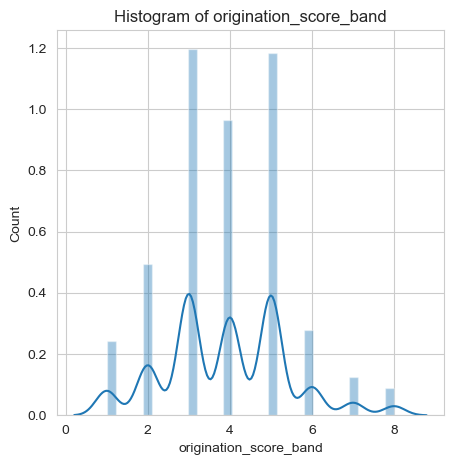

C:\Users\jeana\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


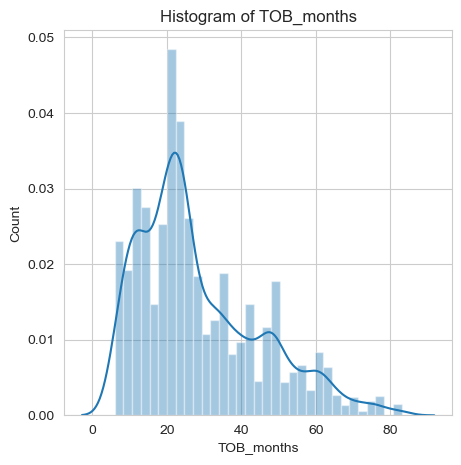

C:\Users\jeana\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


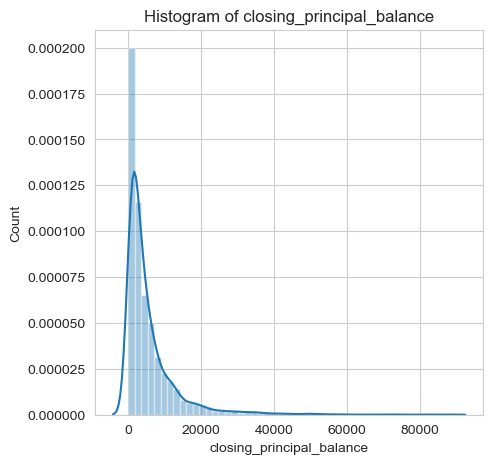

C:\Users\jeana\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


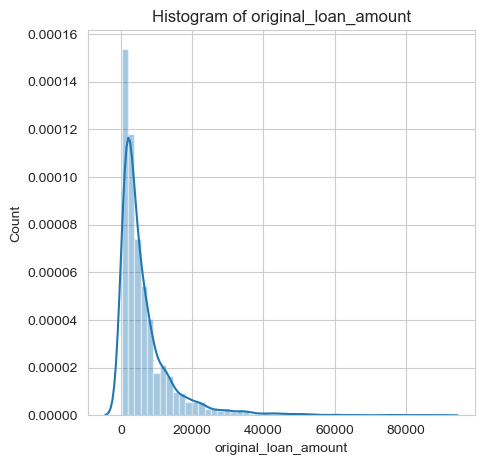

C:\Users\jeana\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


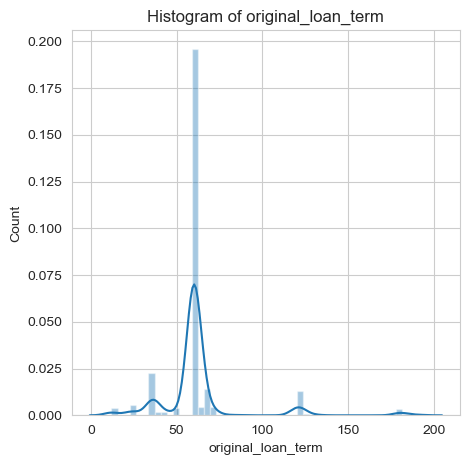

C:\Users\jeana\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


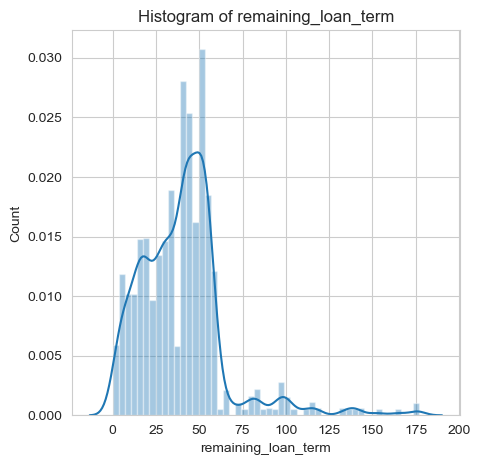

C:\Users\jeana\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


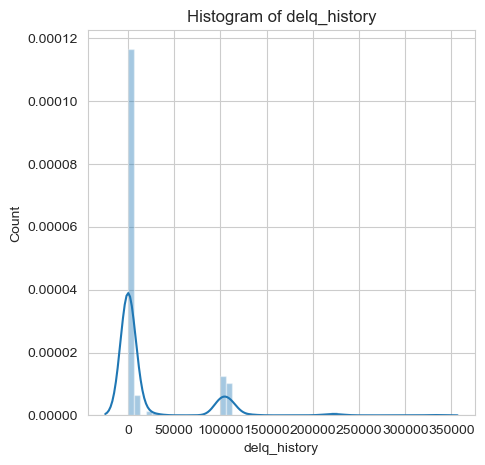

C:\Users\jeana\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


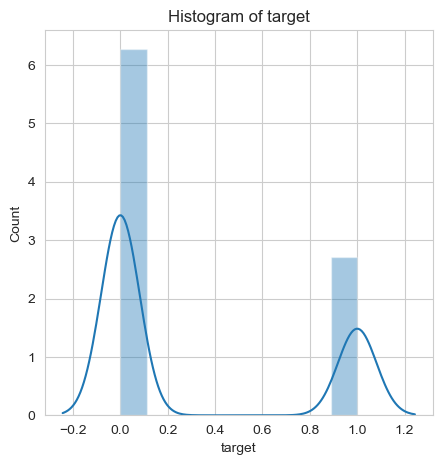

In [6]:
ds.visualizations.histogram(dr)

# Data Cleaning

In [7]:
## Observations; there are 533 duplicates row in the data, 377 null values accross several features and outliers as visualized
## from the boxplots and histplots.
## removing duplicates and null values

In [8]:
## Previewing and removing duplicates
dr.duplicated(subset='loan_id').sum()

533

In [9]:
dr = dr.drop_duplicates(keep='last')

In [10]:
dr.duplicated(subset='loan_id').sum()

0

In [11]:
## dropping coulumns that will not be relevant for prediction

dr = dr.drop(['loan_id','delq_history'], axis=1)

In [12]:
## previewing null values

dr.isnull().sum()

monthly_income               377
origination_score_band         0
TOB_months                   377
closing_principal_balance    377
original_loan_amount         377
product                        0
original_loan_term             0
remaining_loan_term            0
target                         0
dtype: int64

In [13]:
## removing null values using mean function
dr['monthly_income'] = dr['monthly_income'].fillna(dr['monthly_income'].mean())
dr['TOB_months'] = dr['TOB_months'].fillna(dr['TOB_months'].mean())
dr['closing_principal_balance'] = dr['closing_principal_balance'].fillna(dr['closing_principal_balance'].mean())
dr['original_loan_amount'] = dr['original_loan_amount'].fillna(dr['original_loan_amount'].mean())

In [14]:
## previewing data for null values after removing them

dr.isnull().sum()

monthly_income               0
origination_score_band       0
TOB_months                   0
closing_principal_balance    0
original_loan_amount         0
product                      0
original_loan_term           0
remaining_loan_term          0
target                       0
dtype: int64

In [15]:
dr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5250 entries, 0 to 5782
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   monthly_income             5250 non-null   float64
 1   origination_score_band     5250 non-null   int64  
 2   TOB_months                 5250 non-null   float64
 3   closing_principal_balance  5250 non-null   float64
 4   original_loan_amount       5250 non-null   float64
 5   product                    5250 non-null   object 
 6   original_loan_term         5250 non-null   int64  
 7   remaining_loan_term        5250 non-null   int64  
 8   target                     5250 non-null   int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 410.2+ KB


# Outliers

In [16]:
## the histogram and boxplots indicates the presnce of outliers, these can affect the accuracy of from machine leaning
## removing the outliers using quartile function.

# Handling Categorical Feature in the Dataset

In [17]:
## the dataset include a categorical feature 'product' object data type. 
##to enable training we have to convert to numerical data type.
## this can be carried out using LabelEncoder

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
le = LabelEncoder()
label = le.fit_transform(dr["product"])
le.classes_

array(['A', 'B', 'C', 'D'], dtype=object)

In [20]:
## appending the label to the dataframe replacing the column with the value of label
dr["product"] = label

In [21]:
dr.head(2)

monthly_income  origination_score_band  TOB_months  \
0          6000.0                       5        83.0   
1         39000.0                       5        82.0   

   closing_principal_balance  original_loan_amount  product  \
0                      300.0                1800.0        1   
1                     7200.0               11700.0        1   

   original_loan_term  remaining_loan_term  target  
0                  24                    5       0  
1                  60                   42       0

<AxesSubplot:>

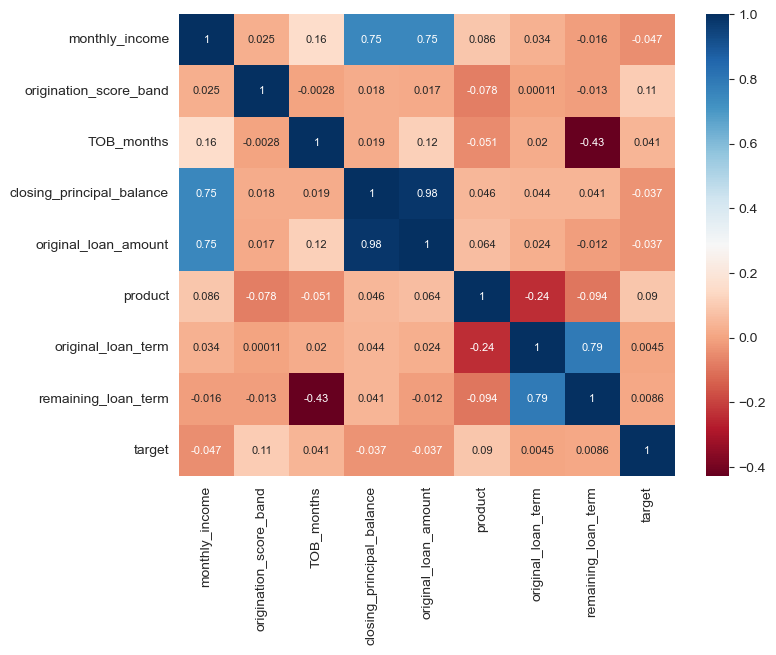

In [22]:
## Using the correlation seaborn function heatmap to view features interactions 
corr = dr.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot = True, cmap='RdBu', annot_kws={'fontsize':8})

# Normalizing the Dataset

In [23]:
## normalizing the dataset to help improve machine learning algorithm. normalizing bring the data range to bwtween 0 and 1

In [24]:
## importing the required module

from sklearn.preprocessing import MinMaxScaler

In [25]:
dr.columns

Index(['monthly_income', 'origination_score_band', 'TOB_months',
       'closing_principal_balance', 'original_loan_amount', 'product',
       'original_loan_term', 'remaining_loan_term', 'target'],
      dtype='object')

In [26]:
x_Data = dr[['monthly_income', 'origination_score_band', 'TOB_months',
       'closing_principal_balance', 'original_loan_amount', 'product',
       'original_loan_term', 'remaining_loan_term', 'target']]

In [27]:
scaler = MinMaxScaler()
scaler.fit(x_Data)
dr = scaler.transform(x_Data)
dr = pd.DataFrame(dr, columns=(['monthly_income', 'origination_score_band', 'TOB_months',
       'closing_principal_balance', 'original_loan_amount', 'product',
       'original_loan_term', 'remaining_loan_term', 'target']))

In [28]:
dr.head(2)

monthly_income  origination_score_band  TOB_months  \
0        0.053030                0.571429    1.000000   
1        0.386364                0.571429    0.987013   

   closing_principal_balance  original_loan_amount   product  \
0                    0.00227              0.018910  0.333333   
1                    0.08059              0.129032  0.333333   

   original_loan_term  remaining_loan_term  target  
0            0.066667             0.028249     0.0  
1            0.266667             0.237288     0.0

# Spliting the data into train and test

In [29]:
## importing required libraries

from sklearn.model_selection import train_test_split

In [30]:
x = dr.drop("target", axis ='columns')
y = dr['target']

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [32]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3937, 8)
(1313, 8)
(3937,)
(1313,)


# Building the model object 

In [33]:
## importing relevant training model

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

In [48]:
## Using LogisticRegression initializing the model

lg_model = LogisticRegression(max_iter=50, random_state=0, solver='lbfgs')


In [49]:
lg_model.fit(x_train, y_train)

y_predict = lg_model.predict(x_test)

y_predict

array([0., 0., 0., ..., 0., 0., 0.])

Accuracy is  70
F1 score is  3
Precision is  30
Recall is  2
****************************************************************************************************
confusion Matrix
                 Score positive    Score negative
Actual positive       909                14
Actual negative       384                 6



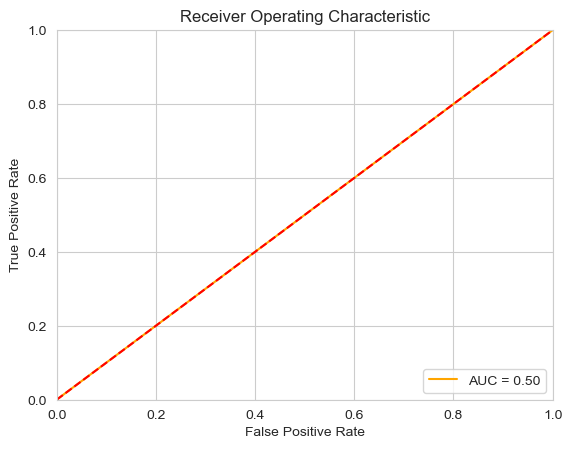

In [50]:
ds.model.get_classification_report(y_test, y_predict)